In [1]:
from IPython.display import Image

def display_graphics(g):
    g.save("/tmp/test.png")
    return Image("/tmp/test.png")

#latex.add_to_preamble(r"\usepackage{amsmath}")
from matplotlib import rc
rc('text', usetex=True)
rc('text.latex', preamble=r'\usepackage{amsmath}')
from contextlib import contextmanager
import sys, os

@contextmanager
def suppress_stdout():
    with open(os.devnull, "w") as devnull:
        old_stdout = sys.stdout
        sys.stdout = devnull
        try:  
            yield
        finally:
            sys.stdout = old_stdout
            
            
import warnings
            
@contextmanager
def suppress_warnings():
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        yield

In [2]:
import sage.all as sg

In [3]:
from flowstar.reachability import *
# flowstar.reachability must be imported before sage otherwise
# sage breaks the flow* yacc parser

In [4]:
from ulbc.bondcalculus import *

In [5]:
m = BondModel("models/plantclock.biocpi")

Running cmd: 'load "models/plantclock.biocpi"' ...


In [6]:
p = BondProcess("Pi", m); p

BondProcess('Pi', <ulbc.bondcalculus.BondModel object at 0x7f238fae6668>)

In [7]:
#s = p.as_system; s
s = System.load_from_script('/tmp/bond-sage-script-l0s67857.py'); s

System(R, (x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13), [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0], (0, -0.300000000000000*x1 + x10, 0, 0.640000000000000*x13 - 0.560000000000000*x3, -0.380000000000000*x4 + x8, -0.680000000000000*x5 + 1.18000000000000*x9, 0, 0, -0.570000000000000*x8 + 1.50000000000000/(0.277008310249308?*x3^2.00000000000000 + 0.277008310249308?*x4^2.00000000000000 + 7.71604938271605?*x5^2.00000000000000 + 1), -0.530000000000000*x9 + 7.60000000000000/(39.06249999999999?*x1^2.00000000000000 + 0.694444444444445?*x3^2.00000000000000 + 1), -0.350000000000000*x10 + (1.50000000000000*x5^2.00000000000000/(x5^2.00000000000000 + 0.0576000000000000) + 1.30000000000000)/(18.90359168241966?*x3^2.00000000000000 + 11.11111111111111?*x4^2.00000000000000 + 1), 0, x7, -0.240000000000000*x13 + 1/(0.250000000000000*x3^2.00000000000000 + 4.72589792060492?*x5^2.00000000000000 + 1)), varmap={'Gene(cCL,tCL,dMCL,dCL,iCL;)': x0, 'Protein(dP97,iP97;)': x1, 'Gene(cEL,tEL,dMEL,dEL,i

In [8]:
r = s.reach(45, order=3, step=(0.01,0.1))

ode in symbolic ring
str_odes = ['[0.000000000000000, 0.000000000000000]', 'x1*[-0.300000000000000, -0.300000000000000] + x10', '[0.000000000000000, 0.000000000000000]', 'x13*[0.640000000000000, 0.640000000000000] + x3*[-0.560000000000000, -0.560000000000000]', 'x4*[-0.380000000000000, -0.380000000000000] + x8', 'x5*[-0.680000000000000, -0.680000000000000] + x9*[1.18000000000000, 1.18000000000000]', '[0.000000000000000, 0.000000000000000]', '[0.000000000000000, 0.000000000000000]', 'x8*[-0.570000000000000, -0.570000000000000] + ([1.50000000000000, 1.50000000000000])/((x3)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x4)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x5)^2.00000000000000*[7.71604938271604, 7.71604938271606] + [1.00000000000000, 1.00000000000000])', 'x9*[-0.530000000000000, -0.530000000000000] + ([7.60000000000000, 7.60000000000000])/((x1)^2.00000000000000*[39.0624999999999, 39.0625000000000] + (x3)^2.00000000000000*[0.694444444444444, 0.6944444

In [9]:
r(3)

in eval
fp.size = 524
fp_compo.size = 524
flowpipesCompo.size = 0
domains.size = 524
[3.0..3.0] overlaps [2.9617905548031644..3.0559156628676063]
doing normal eval
fp_compo->has_value() = False


[1,
 3.1?,
 1,
 0.266?,
 0.43?,
 2.48?,
 1,
 1,
 0.142?,
 0.99?,
 1.83?,
 1,
 3.000000000000?,
 0.256?]

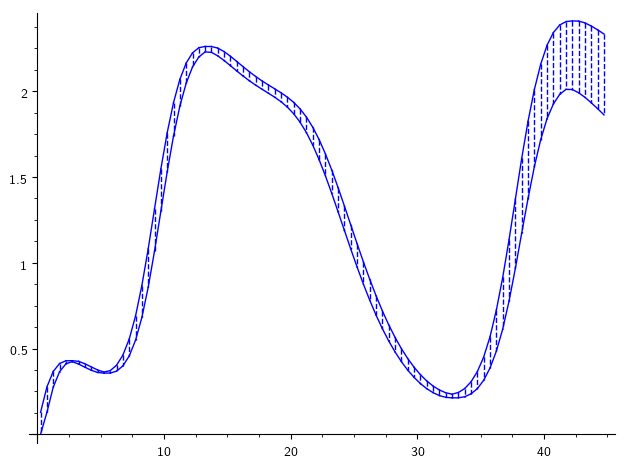

In [10]:
with suppress_stdout():
    g = r.sage_time_tube_plot(s.n("Protein(dEL,iEL;)"), 0.5, t=s.n('Time'))
    
display_graphics(g)

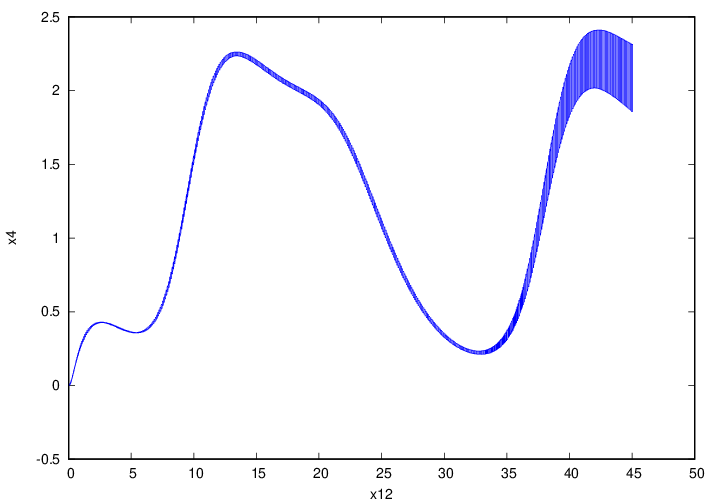

In [11]:
r.wplot(s.n('Time'), s.n("Protein(dEL,iEL;)"))

In [12]:
from ulbc.logic import *

In [13]:
s.PR

Multivariate Polynomial Ring in x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13 over Real Interval Field with 53 bits of precision

In [14]:
s.v("Protein(dEL,iEL;)").parent()

Symbolic Ring

In [15]:
at = Atomic(s.v("Protein(dEL,iEL;)") - 1.5); at

Atomic(x4 - 1.50000000000000)

In [16]:
#g = at.sage_plot(r)

In [17]:
#display_graphics(g)

In [18]:
g = at.visualize(s, 45, tentative_unpreconditioning=False)

ode in symbolic ring
str_odes = ['[0.000000000000000, 0.000000000000000]', 'x1*[-0.300000000000000, -0.300000000000000] + x10', '[0.000000000000000, 0.000000000000000]', 'x13*[0.640000000000000, 0.640000000000000] + x3*[-0.560000000000000, -0.560000000000000]', 'x4*[-0.380000000000000, -0.380000000000000] + x8', 'x5*[-0.680000000000000, -0.680000000000000] + x9*[1.18000000000000, 1.18000000000000]', '[0.000000000000000, 0.000000000000000]', '[0.000000000000000, 0.000000000000000]', 'x8*[-0.570000000000000, -0.570000000000000] + ([1.50000000000000, 1.50000000000000])/((x3)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x4)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x5)^2.00000000000000*[7.71604938271604, 7.71604938271606] + [1.00000000000000, 1.00000000000000])', 'x9*[-0.530000000000000, -0.530000000000000] + ([7.60000000000000, 7.60000000000000])/((x1)^2.00000000000000*[39.0624999999999, 39.0625000000000] + (x3)^2.00000000000000*[0.694444444444444, 0.6944444

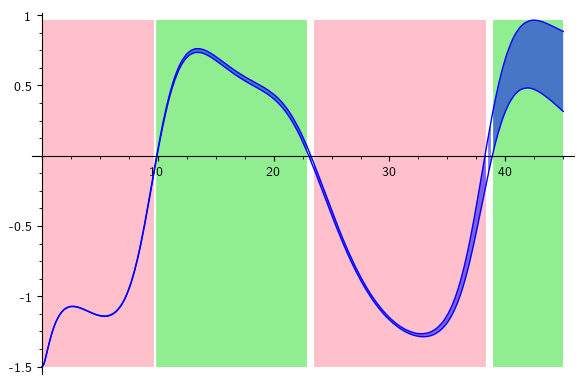

In [19]:
g.set_aspect_ratio('automatic')
g

In [20]:
#observer = PolyObserver(at.p, r)

In [21]:
#observer.roots()

In [22]:
#r = s.reach(45)

In [23]:
observer = SageObserver(at.p, r, tentative_unpreconditioning=True)

SageObserver(x4 - 1.50000000000000, <flowstar.reachability.Reach object at 0x55aa94c2c878>, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
make_interval_fn with f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
make_interval_fn with f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374dc62f0>


In [24]:
observer.tentative_unpreconditioning

True

In [25]:
vector([at.p.diff(x) for x in s.x])*s.y

-0.380000000000000*x4 + x8

In [26]:
s

System(R, (x0, x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13), [1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0], (0, -0.300000000000000*x1 + x10, 0, 0.640000000000000*x13 - 0.560000000000000*x3, -0.380000000000000*x4 + x8, -0.680000000000000*x5 + 1.18000000000000*x9, 0, 0, -0.570000000000000*x8 + 1.50000000000000/(0.277008310249308?*x3^2.00000000000000 + 0.277008310249308?*x4^2.00000000000000 + 7.71604938271605?*x5^2.00000000000000 + 1), -0.530000000000000*x9 + 7.60000000000000/(39.06249999999999?*x1^2.00000000000000 + 0.694444444444445?*x3^2.00000000000000 + 1), -0.350000000000000*x10 + (1.50000000000000*x5^2.00000000000000/(x5^2.00000000000000 + 0.0576000000000000) + 1.30000000000000)/(18.90359168241966?*x3^2.00000000000000 + 11.11111111111111?*x4^2.00000000000000 + 1), 0, x7, -0.240000000000000*x13 + 1/(0.250000000000000*x3^2.00000000000000 + 4.72589792060492?*x5^2.00000000000000 + 1)), varmap={'Gene(cCL,tCL,dMCL,dCL,iCL;)': x0, 'Protein(dP97,iP97;)': x1, 'Gene(cEL,tEL,dMEL,dEL,i

In [27]:
observer.f

x4 - 1.50000000000000

In [28]:
observer.fprime

-0.380000000000000*x4 + x8

In [29]:
#observer.roots()

In [30]:
#g = at.visualize(s, 45, tentative_unpreconditioning=True)

In [31]:
#g.set_aspect_ratio('automatic')
#display_graphics( g )

In [32]:
at.signal_for_system(s, 45, symbolic_composition=True, tentative_unpreconditioning=False, verbosity=3)

ode in symbolic ring
str_odes = ['[0.000000000000000, 0.000000000000000]', 'x1*[-0.300000000000000, -0.300000000000000] + x10', '[0.000000000000000, 0.000000000000000]', 'x13*[0.640000000000000, 0.640000000000000] + x3*[-0.560000000000000, -0.560000000000000]', 'x4*[-0.380000000000000, -0.380000000000000] + x8', 'x5*[-0.680000000000000, -0.680000000000000] + x9*[1.18000000000000, 1.18000000000000]', '[0.000000000000000, 0.000000000000000]', '[0.000000000000000, 0.000000000000000]', 'x8*[-0.570000000000000, -0.570000000000000] + ([1.50000000000000, 1.50000000000000])/((x3)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x4)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x5)^2.00000000000000*[7.71604938271604, 7.71604938271606] + [1.00000000000000, 1.00000000000000])', 'x9*[-0.530000000000000, -0.530000000000000] + ([7.60000000000000, 7.60000000000000])/((x1)^2.00000000000000*[39.0624999999999, 39.0625000000000] + (x3)^2.00000000000000*[0.694444444444444, 0.6944444

skipping given consistent value over domain
===
reached detect roots t=[4.284404374626941..4.284404374626974] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[4.383548705700159..4.383548705700194] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[4.482693036773377..4.482693036773413] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[4.581837367846594..4.581837367846632] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[4.680981698919812..4.680981698919852] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[4.7801260299930295..4.780126029993071] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[4.879270361066247..4.879270361066291] + [0.0..0.0991443310732187]
skipping given consistent value o

skipping given consistent value over domain
===
reached detect roots t=[12.017662198337844..12.017662198338089] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[12.11680652941106..12.116806529411308] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[12.215950860484275..12.215950860484527] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[12.315095191557491..12.315095191557747] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[12.414239522630707..12.414239522630966] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[12.513383853703923..12.513383853704186] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[12.612528184777139..12.612528184777405] + [0.0..0.0991443310732187]
skipping given consis

skipping given consistent value over domain
===
reached detect roots t=[18.362899387023575..18.362899387024132] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[18.462043718096787..18.462043718097352] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[18.56118804917..18.56118804917057] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[18.66033238024321..18.66033238024379] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[18.759476711316424..18.75947671131701] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[18.858621042389636..18.85862104239023] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[18.95776537346285..18.95776537346345] + [0.0..0.0991443310732187]
skipping given consistent value

skipping given consistent value over domain
===
reached detect roots t=[25.303002562148436..25.30300256214949] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[25.402146893221648..25.40214689322271] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[25.50129122429486..25.50129122429593] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[25.600435555368072..25.60043555536915] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[25.699579886441285..25.69957988644237] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[25.798724217514497..25.798724217515588] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[25.89786854858771..25.897868548588807] + [0.0..0.0991443310732187]
skipping given consistent v

skipping given consistent value over domain
===
reached detect roots t=[34.721714014103405..34.72171401410534] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[34.82085834517661..34.82085834517856] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[34.920002676249815..34.92000267625178] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[35.01914700732302..35.019147007324996] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[35.118291338396226..35.118291338398215] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[35.21743566946943..35.217435669471435] + [0.0..0.0991443310732187]
skipping given consistent value over domain
===
reached detect roots t=[35.316580000542636..35.316580000544654] + [0.0..0.0991443310732187]
skipping given consistent 

Monitored signal 3.4290714263916016 sec


Signal([0.0000000000000000 .. 45.000000000000000], [([0.0000000000000000 .. 9.9156129363569843], False), ([9.9156129363593130 .. 23.120079648499346], True), ([23.120079648504034 .. 38.524047384198973], False), ([38.524047384201665 .. 45.000000000000000], True)], mask=None)

In [33]:
at.signal_for_system(s, 45, symbolic_composition=True, tentative_unpreconditioning=True, verbosity=4)

ode in symbolic ring
str_odes = ['[0.000000000000000, 0.000000000000000]', 'x1*[-0.300000000000000, -0.300000000000000] + x10', '[0.000000000000000, 0.000000000000000]', 'x13*[0.640000000000000, 0.640000000000000] + x3*[-0.560000000000000, -0.560000000000000]', 'x4*[-0.380000000000000, -0.380000000000000] + x8', 'x5*[-0.680000000000000, -0.680000000000000] + x9*[1.18000000000000, 1.18000000000000]', '[0.000000000000000, 0.000000000000000]', '[0.000000000000000, 0.000000000000000]', 'x8*[-0.570000000000000, -0.570000000000000] + ([1.50000000000000, 1.50000000000000])/((x3)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x4)^2.00000000000000*[0.277008310249307, 0.277008310249308] + (x5)^2.00000000000000*[7.71604938271604, 7.71604938271606] + [1.00000000000000, 1.00000000000000])', 'x9*[-0.530000000000000, -0.530000000000000] + ([7.60000000000000, 7.60000000000000])/((x1)^2.00000000000000*[39.0624999999999, 39.0625000000000] + (x3)^2.00000000000000*[0.694444444444444, 0.6944444

reached detect roots t=[4.879270361066247..4.879270361066291] + [0.0..0.0991443310732187]
not using mask!
f_domain = [-1.1359282768978087..-1.1359232837218116]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[4.978414692139465..4.97841469213951] + [0.0..0.0991443310732187]
not using mask!
f_domain = [-1.1379204489005734..-1.1379153138498743]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[5.077559023212682..5.0775590232127294] + [0.0..0.0991443310732187]
not using mask!
f_domain = [-1.1395520434805615..-1.139546754161268]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[5.1767033542859..5.176703354285949] + [0.0..0.0991443310732187]
not using mask!
f_domain = [-1.140787807744179..-1.1407823507125805]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[5.275847685359118..5.275847685359168] + [0.0..0.0991443310732187]
not us

f_domain = [0.7451358253684819..0.7452043015911176]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[13.207394171216434..13.207394171216722] + [0.0..0.0991443310732187]
not using mask!
f_domain = [0.7472171512888437..0.7472858827110196]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[13.30653850228965..13.306538502289941] + [0.0..0.0991443310732187]
not using mask!
f_domain = [0.7485094825388399..0.7485784470645065]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[13.405682833362865..13.40568283336316] + [0.0..0.0991443310732187]
not using mask!
f_domain = [0.7490620472912584..0.7491312240317152]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[13.504827164436081..13.50482716443638] + [0.0..0.0991443310732187]
not using mask!
f_domain = [0.7489229602620968..0.748992329452701]
skipping given consistent value over domain 

f_domain = [-0.48919764413448674..-0.4891103237501895]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[25.50129122429486..25.50129122429593] + [0.0..0.0991443310732187]
not using mask!
f_domain = [-0.5098247072611056..-0.5097382604510899]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[25.600435555368072..25.60043555536915] + [0.0..0.0991443310732187]
not using mask!
f_domain = [-0.5302605018526805..-0.5301749534175599]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[25.699579886441285..25.69957988644237] + [0.0..0.0991443310732187]
not using mask!
f_domain = [-0.550493138037432..-0.5504085106822187]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[25.798724217514497..25.798724217515588] + [0.0..0.0991443310732187]
not using mask!
f_domain = [-0.5705114899720443..-0.5704278043521448]
skipping given consistent value ov

not using mask!
f_domain = [-1.170433711849693..-1.1703245931488244]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[35.01914700732302..35.019147007324996] + [0.0..0.0991443310732187]
not using mask!
f_domain = [-1.1578005291254105..-1.1576860112030367]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[35.118291338396226..35.118291338398215] + [0.0..0.0991443310732187]
not using mask!
f_domain = [-1.1442063807707814..-1.144086150883516]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[35.21743566946943..35.217435669471435] + [0.0..0.0991443310732187]
not using mask!
f_domain = [-1.1296079636041654..-1.129481699980077]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[35.316580000542636..35.316580000544654] + [0.0..0.0991443310732187]
not using mask!
f_domain = [-1.1139616859121382..-1.1138290584847217]
skipping given cons

f_domain = [0.602574455867221..0.6033300873677421]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[44.834435783570335..44.83443578357372] + [0.0..0.0991443310732187]
not using mask!
f_domain = [0.5966316256480608..0.5973880963800609]
skipping given consistent value over domain (unpreconditioned)
===
reached detect roots t=[44.93358011464354..44.93358011464694] + [0.0..0.0991443310732187]
not using mask!
f_domain = [0.5906822048753471..0.5914395870420259]
skipping given consistent value over domain (unpreconditioned)
roots = []
domain = [0.0000000000000000 .. 44.999999999999993]
roots = []
seg_domain = [0.0000000000000000 .. 44.999999999999993]
roots = []
Monitored signal 1.3878436088562012 sec


Signal([0.0000000000000000 .. 45.000000000000000], [([0.0000000000000000 .. 44.999999999999993], True)], mask=None)

args = [1, 0.00000?, 1, 0.?e-6, 0.00000?, 0.0000?, 1, 1, 0.0000?, 0.0000?, 0.000?, 1, 0, 0.0000?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.50000?
args = [1, 0.0031?, 1, 0.00151?, 0.00352?, 0.0210?, 1, 1, 0.1018?, 0.5170?, 0.090?, 1, 0.0692828920340697?, 0.0687?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.49648?
args = [1, 0.0078?, 1, 0.00379?, 0.0089?, 0.0524?, 1, 1, 0.160?, 0.816?, 0.143?, 1, 0.1105252336221337?, 0.109?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.4912?
args = [1, 0.0139?, 1, 0.00671?, 0.0156?, 0.0924?, 1, 1, 0.210?, 1.080?, 0.194?, 1, 0.147911546681264?, 0.1441?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.4845?
args = [1, 0.027?, 1, 0.0124?, 0.0286?, 0.1704?, 1, 1, 0.276?, 1.456?, 0.28?, 1, 0.203213930653034?, 0.193?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1

args = [1, 2.61?, 1, 0.255?, 0.428?, 2.7?, 1, 1, 0.170?, 1.25?, 1.82?, 1, 2.532028848966?, 0.271?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.072?
args = [1, 2.7?, 1, 0.257?, 0.428?, 2.7?, 1, 1, 0.167?, 1.22?, 1.82?, 1, 2.582210553713?, 0.269?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.072?
args = [1, 2.7?, 1, 0.258?, 0.428?, 2.7?, 1, 1, 0.164?, 1.20?, 1.9?, 1, 2.613497911470?, 0.268?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.072?
args = [1, 2.8?, 1, 0.259?, 0.428?, 2.7?, 1, 1, 0.163?, 1.19?, 1.9?, 1, 2.641575288081?, 0.267?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.072?
args = [1, 2.80?, 1, 0.260?, 0.428?, 2.7?, 1, 1, 0.158?, 1.14?, 1.83?, 1, 2.718818730498?, 0.264?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.072?
args = [1, 2.9?, 1, 0.261?, 0.428?, 2.60?, 1, 1, 0.156?, 1.1

args = [1, 4.8?, 1, 0.29?, 0.36?, 1.10?, 1, 1, 0.145?, 0.28?, 1.9?, 1, 5.54714648616?, 0.29?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.14?
args = [1, 4.8?, 1, 0.29?, 0.36?, 1.08?, 1, 1, 0.15?, 0.27?, 1.91?, 1, 5.592866800009?, 0.30?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.14?
args = [1, 4.8?, 1, 0.29?, 0.36?, 1.07?, 1, 1, 0.15?, 0.27?, 1.91?, 1, 5.616995604176?, 0.30?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.14?
args = [1, 4.8?, 1, 0.29?, 0.36?, 1.05?, 1, 1, 0.16?, 0.26?, 1.91?, 1, 5.674455781387?, 0.30?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.14?
args = [1, 4.9?, 1, 0.29?, 0.36?, 1.02?, 1, 1, 0.16?, 0.25?, 1.91?, 1, 5.72751415374?, 0.31?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.14?
args = [1, 4.9?, 1, 0.30?, 0.37?, 1.00?, 1, 1, 0.17?, 0.25?, 1.91?, 1, 5.790388337

args = [1, 5.3?, 1, 0.63?, 0.81?, 0.34?, 1, 1, 0.68?, 0.072?, 1.4?, 1, 8.35278728747?, 0.94?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.69?
args = [1, 5.3?, 1, 0.63?, 0.81?, 0.34?, 1, 1, 0.68?, 0.071?, 1.4?, 1, 8.37644462297?, 0.95?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.69?
args = [1, 5.3?, 1, 0.65?, 0.84?, 0.33?, 1, 1, 0.71?, 0.069?, 1.37?, 1, 8.44831560075?, 0.98?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.66?
args = [1, 5.3?, 1, 0.67?, 0.87?, 0.32?, 1, 1, 0.73?, 0.067?, 1.4?, 1, 8.51269715785?, 1.00?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.63?
args = [1, 5.3?, 1, 0.67?, 0.88?, 0.32?, 1, 1, 0.73?, 0.067?, 1.4?, 1, 8.53429222757?, 1.01?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.62?
args = [1, 5.3?, 1, 0.69?, 0.90?, 0.31?, 1, 1, 0.75?, 0.065?, 1.32?, 1, 8.5973688478

args = [1, 0.48?, 1, 0.108?, 0.220?, 1.59?, 1, 1, 0.370?, 2.83?, 1.29?, 1, 0.7871205454070?, 0.340?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.281?
args = [1, 0.52?, 1, 0.114?, 0.230?, 1.67?, 1, 1, 0.365?, 2.80?, 1.33?, 1, 0.8236521190439?, 0.339?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.270?
args = [1, 0.59?, 1, 0.122?, 0.246?, 1.79?, 1, 1, 0.357?, 2.75?, 1.39?, 1, 0.8816226199826?, 0.339?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.254?
args = [1, 0.65?, 1, 0.130?, 0.259?, 1.89?, 1, 1, 0.349?, 2.70?, 1.44?, 1, 0.9327449578199?, 0.337?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.241?
args = [1, 0.71?, 1, 0.136?, 0.270?, 1.97?, 1, 1, 0.343?, 2.7?, 1.47?, 1, 0.9770691267498?, 0.336?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.230?
args = [1, 0.80?, 1, 0.146?, 0.286?, 2.09?, 1,

args = [1, 3.7?, 1, 0.271?, 0.402?, 2.1?, 1, 1, 0.116?, 0.68?, 1.9?, 1, 3.739670485614?, 0.241?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.098?
args = [1, 3.7?, 1, 0.271?, 0.40?, 2.03?, 1, 1, 0.115?, 0.67?, 1.9?, 1, 3.783132083713?, 0.241?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.10?
args = [1, 3.8?, 1, 0.271?, 0.40?, 2.0?, 1, 1, 0.114?, 0.65?, 1.84?, 1, 3.825205309714?, 0.24?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.11?
args = [1, 3.8?, 1, 0.272?, 0.40?, 2.0?, 1, 1, 0.113?, 0.63?, 1.84?, 1, 3.887464168113?, 0.240?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.11?
args = [1, 3.8?, 1, 0.272?, 0.40?, 2.0?, 1, 1, 0.112?, 0.62?, 1.84?, 1, 3.937015821951?, 0.240?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.11?
args = [1, 3.9?, 1, 0.272?, 0.40?, 1.90?, 1, 1, 0.111?, 0.60?, 1.84?, 

args = [1, 5.3?, 1, 0.38?, 0.46?, 0.61?, 1, 1, 0.33?, 0.133?, 1.8?, 1, 7.01564814109?, 0.52?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.04?
args = [1, 5.3?, 1, 0.39?, 0.47?, 0.59?, 1, 1, 0.34?, 0.129?, 1.8?, 1, 7.07299918559?, 0.53?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.03?
args = [1, 5.3?, 1, 0.40?, 0.48?, 0.58?, 1, 1, 0.35?, 0.126?, 1.77?, 1, 7.12453306745?, 0.54?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.02?
args = [1, 5.3?, 1, 0.40?, 0.49?, 0.57?, 1, 1, 0.36?, 0.123?, 1.8?, 1, 7.17795194326?, 0.56?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.01?
args = [1, 5.3?, 1, 0.41?, 0.49?, 0.56?, 1, 1, 0.37?, 0.121?, 1.8?, 1, 7.20652523696?, 0.56?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.01?
args = [1, 5.4?, 1, 0.41?, 0.50?, 0.55?, 1, 1, 0.38?, 0.118?, 1.8?, 1, 7.25769786715

args = [1, 5.0?, 1, 0.94?, 1.27?, 0.216?, 1, 1, 0.95?, 0.047?, 1.05?, 1, 9.41882170617?, 1.35?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.23?
args = [1, 5.0?, 1, 0.96?, 1.3?, 0.21?, 1, 1, 0.96?, 0.046?, 1.03?, 1, 9.47686625922?, 1.37?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.2?
args = [1, 4.9?, 1, 0.98?, 1.32?, 0.21?, 1, 1, 0.97?, 0.045?, 1.1?, 1, 9.52213494326?, 1.39?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.18?
args = [1, 4.9?, 1, 1.00?, 1.34?, 0.21?, 1, 1, 0.98?, 0.045?, 1.00?, 1, 9.57079920499?, 1.41?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.16?
args = [1, 4.9?, 1, 1.01?, 1.4?, 0.20?, 1, 1, 0.99?, 0.044?, 1.0?, 1, 9.62060851191?, 1.42?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.2?
args = [1, 4.9?, 1, 1.02?, 1.38?, 0.20?, 1, 1, 0.99?, 0.043?, 1.0?, 1, 9.65559347992?

args = [1, 1.70?, 1, 0.216?, 0.393?, 2.8?, 1, 1, 0.241?, 1.86?, 1.77?, 1, 1.746697314950?, 0.304?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.107?
args = [1, 1.80?, 1, 0.222?, 0.399?, 2.8?, 1, 1, 0.233?, 1.79?, 1.78?, 1, 1.821141479948?, 0.300?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.101?
args = [1, 1.86?, 1, 0.225?, 0.403?, 2.8?, 1, 1, 0.227?, 1.75?, 1.79?, 1, 1.871701261912?, 0.298?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.097?
args = [1, 1.91?, 1, 0.228?, 0.406?, 2.8?, 1, 1, 0.223?, 1.71?, 1.79?, 1, 1.9149051368676?, 0.296?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.094?
args = [1, 1.98?, 1, 0.231?, 0.410?, 2.8?, 1, 1, 0.217?, 1.66?, 1.80?, 1, 1.970364439409?, 0.294?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.090?
args = [1, 2.05?, 1, 0.234?, 0.413?, 2.78?, 1, 1, 0.21

args = [1, 4.0?, 1, 0.272?, 0.385?, 1.79?, 1, 1, 0.110?, 0.54?, 1.85?, 1, 4.191748979289?, 0.240?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.115?
args = [1, 4.0?, 1, 0.272?, 0.39?, 1.8?, 1, 1, 0.110?, 0.53?, 1.85?, 1, 4.231854315889?, 0.240?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.12?
args = [1, 4.1?, 1, 0.272?, 0.39?, 1.75?, 1, 1, 0.110?, 0.52?, 1.85?, 1, 4.260239193733?, 0.240?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.12?
args = [1, 4.1?, 1, 0.272?, 0.38?, 1.72?, 1, 1, 0.110?, 0.51?, 1.85?, 1, 4.307670430966?, 0.24?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.12?
args = [1, 4.1?, 1, 0.272?, 0.38?, 1.68?, 1, 1, 0.110?, 0.49?, 1.86?, 1, 4.379208247164?, 0.25?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.13?
args = [1, 4.2?, 1, 0.272?, 0.38?, 1.65?, 1, 1, 0.110?, 0.48?, 1.8

args = [1, 5.2?, 1, 0.35?, 0.42?, 0.70?, 1, 1, 0.27?, 0.156?, 1.85?, 1, 6.67947177145?, 0.44?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.08?
args = [1, 5.2?, 1, 0.36?, 0.43?, 0.68?, 1, 1, 0.28?, 0.151?, 1.84?, 1, 6.74951608438?, 0.46?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.08?
args = [1, 5.3?, 1, 0.36?, 0.43?, 0.68?, 1, 1, 0.28?, 0.150?, 1.9?, 1, 6.76016430884?, 0.46?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.08?
args = [1, 5.3?, 1, 0.36?, 0.44?, 0.66?, 1, 1, 0.29?, 0.146?, 1.83?, 1, 6.82024944374?, 0.47?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.07?
args = [1, 5.3?, 1, 0.37?, 0.45?, 0.64?, 1, 1, 0.31?, 0.14?, 1.9?, 1, 6.89665178973?, 0.49?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.06?
args = [1, 5.3?, 1, 0.37?, 0.45?, 0.63?, 1, 1, 0.31?, 0.14?, 1.8?, 1, 6.94161575734

args = [1, 4.9?, 1, 1.00?, 1.35?, 0.20?, 1, 1, 0.98?, 0.044?, 1.0?, 1, 9.59268191339?, 1.41?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.15?
args = [1, 4.9?, 1, 1.03?, 1.4?, 0.20?, 1, 1, 0.99?, 0.043?, 0.97?, 1, 9.66441621534?, 1.44?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.2?
args = [1, 4.8?, 1, 1.04?, 1.4?, 0.191?, 1, 1, 1.00?, 0.043?, 0.96?, 1, 9.71000006607?, 1.46?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.1?
args = [1, 4.8?, 1, 1.06?, 1.5?, 0.188?, 1, 1, 1.0?, 0.042?, 0.95?, 1, 9.74738203165?, 1.47?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.1?
args = [1, 4.8?, 1, 1.08?, 1.5?, 0.19?, 1, 1, 1.01?, 0.041?, 0.93?, 1, 9.81678651900?, 1.49?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.1?
args = [1, 4.8?, 1, 1.10?, 1.5?, 0.179?, 1, 1, 1.02?, 0.041?, 1.0?, 1, 9.86625638143?, 1

args = [1, 1.64?, 1, 0.213?, 0.388?, 2.8?, 1, 1, 0.246?, 1.9?, 1.76?, 1, 1.698744669904?, 0.306?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.112?
args = [1, 1.69?, 1, 0.215?, 0.40?, 2.73?, 1, 1, 0.242?, 1.87?, 1.77?, 1, 1.734462913993?, 0.304?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.11?
args = [1, 1.75?, 1, 0.219?, 0.396?, 2.8?, 1, 1, 0.237?, 1.9?, 1.78?, 1, 1.7839193974482?, 0.302?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.104?
args = [1, 1.83?, 1, 0.223?, 0.401?, 2.76?, 1, 1, 0.230?, 1.77?, 1.8?, 1, 1.8464213709294?, 0.299?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.099?
args = [1, 1.9?, 1, 0.226?, 0.41?, 2.77?, 1, 1, 0.225?, 1.73?, 1.79?, 1, 1.893303199390?, 0.297?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.10?
args = [1, 2.0?, 1, 0.229?, 0.408?, 2.8?, 1, 1, 0.220?, 1.

args = [1, 4.6?, 1, 0.28?, 0.36?, 1.29?, 1, 1, 0.13?, 0.34?, 1.89?, 1, 5.133692926870?, 0.27?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.14?
args = [1, 4.6?, 1, 0.278?, 0.36?, 1.26?, 1, 1, 0.127?, 0.33?, 1.9?, 1, 5.195940139822?, 0.27?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.14?
args = [1, 4.6?, 1, 0.28?, 0.36?, 1.22?, 1, 1, 0.130?, 0.32?, 1.90?, 1, 5.265182393955?, 0.27?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.15?
args = [1, 4.7?, 1, 0.28?, 0.36?, 1.20?, 1, 1, 0.14?, 0.31?, 1.90?, 1, 5.321722910713?, 0.28?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.15?
args = [1, 4.7?, 1, 0.281?, 0.36?, 1.18?, 1, 1, 0.135?, 0.30?, 1.90?, 1, 5.36895913186?, 0.28?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -1.15?
args = [1, 4.7?, 1, 0.29?, 0.36?, 1.16?, 1, 1, 0.14?, 0.30?, 1.90?, 1, 5.4041

args = [1, 5.4?, 1, 0.45?, 0.56?, 0.49?, 1, 1, 0.44?, 0.104?, 1.7?, 1, 7.52507530926?, 0.65?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.94?
args = [1, 5.4?, 1, 0.46?, 0.57?, 0.48?, 1, 1, 0.46?, 0.102?, 1.7?, 1, 7.57643604539?, 0.67?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.93?
args = [1, 5.4?, 1, 0.47?, 0.58?, 0.47?, 1, 1, 0.47?, 0.100?, 1.7?, 1, 7.61845863079?, 0.68?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.92?
args = [1, 5.4?, 1, 0.48?, 0.59?, 0.46?, 1, 1, 0.48?, 0.098?, 1.7?, 1, 7.67397654260?, 0.70?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.91?
args = [1, 5.4?, 1, 0.49?, 0.61?, 0.45?, 1, 1, 0.49?, 0.095?, 1.7?, 1, 7.72048653625?, 0.72?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.90?
args = [1, 5.4?, 1, 0.49?, 0.61?, 0.45?, 1, 1, 0.50?, 0.094?, 1.6?, 1, 7.75094726531?

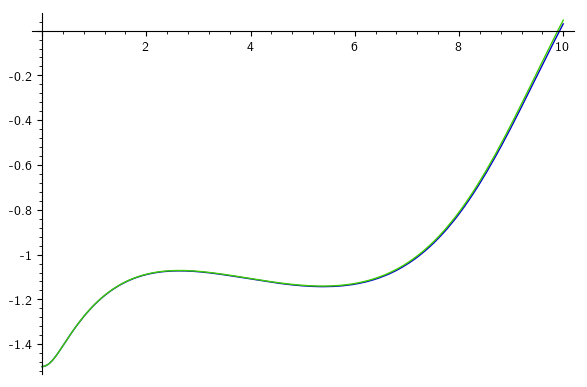

In [34]:
plot((lambda t: observer(t).lower(), lambda t: observer(t).upper()),
     (s.n('Time'), 0, 10))

In [35]:
at.signal(r, s.y, symbolic_composition=False, tentative_unpreconditioning=True, verbosity=4)

PolyObserver(x4 - 1.5000000000000000?, <flowstar.reachability.Reach object at 0x55aa94c2c878>, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
roots(space_domain=None, epsilon=1e-05, verbosity=4)
===
reached detect roots t=[0.0..0.0] + [0.0..0.05]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[0.049999999999999996..0.05] + [0.0..0.027500000000000007]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[0.07749999999999999..0.07750000000000001] + [0.0..0.030250000000000013]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[0.10774999999999998..0.10775000000000003] + [0.0..0.03327500000000002]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[0.14102499999999996..0.14102500000000007] + [0.0..0.018301250000000015]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[0.159326249999

not using mask!
skipping given consistent value over domain
===
reached detect roots t=[23.010438572528482..23.010438572529424] + [0.0..0.09412510806444159]
not using mask!
detect_roots(T0=[0.0..0.09412510806444159], epsilon=1e-05, verbosity=4)
T = [0.0..0.09412510806444159]
M = [0.047062554032220795..0.047062554032220795]
fI = [-0.004685940975858616..0.029150048992314437]
T = [0.02069684797204832..0.09412510806444159]
M = [0.057410978018244956..0.057410978018244956]
fI = [-0.006752550883607933..0.027083439084568672]
Tfinal = [0.02069684797204832..0.09412510806444159]
root on boundary!
new root:
[23.03113542050053..23.104563680593866]
===
reached detect roots t=[23.104563680592918..23.104563680593866] + [0.0..0.09412510806444159]
not using mask!
detect_roots(T0=[0.0..0.09412510806444159], epsilon=1e-05, verbosity=4)
T = [0.0..0.09412510806444159]
M = [0.047062554032220795..0.047062554032220795]
fI = [-0.02361279620926937..0.010249683885898087]
Tfinal = [-0.0..0.09412510806444159]
root 

not using mask!
skipping given consistent value over domain
===
reached detect roots t=[43.240095264098144..43.24009526410169] + [0.0..0.0949560108155173]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[43.33505127491365..43.33505127491721] + [0.0..0.0949560108155173]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[43.43000728572916..43.430007285732735] + [0.0..0.0949560108155173]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[43.52496329654467..43.52496329654826] + [0.0..0.0949560108155173]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[43.61991930736018..43.61991930736378] + [0.0..0.0949560108155173]
not using mask!
skipping given consistent value over domain
===
reached detect roots t=[43.714875318175686..43.7148753181793] + [0.0..0.0949560108155173]
not using mask!
skipping given consistent value over domain
===
reached de

Signal([0.0000000000000000 .. 44.998999999999996], [([0.0000000000000000 .. 9.8964197290135978], False), ([9.9329180265863392 .. 23.031135420500530], True), ([23.202165202124774 .. 38.267020206404489], False), ([38.829881638748048 .. 44.998999999999996], True)], mask=None)

In [36]:
at.signal(observer, s.y, verbosity=4, tentative_unpreconditioning=True)

SageObserver(x4 - 1.50000000000000, <flowstar.reachability.Reach object at 0x55aa94c2c878>, symbolic_composition=False, tentative_unpreconditioning=True, mask=None)
make_interval_fn with f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f238ce96f28>
make_interval_fn with f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f238ce96840>
roots(space_domain=None, epsilon=1e-05, verbosity=4)
===
reached detect roots t=[0.0..0.0] + [0.0..0.05]
not using mask!
args = [1, 0.00?, 1, 0.000?, 0.00?, 0.0?, 1, 1, 0.0?, 0.?, 0.0?, 1, 0.1?, 0.0?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f238ce96f28>
y_py = -1.50?
skipping given consistent value over domain
===
reached detect roots t=[0.049999999999999996..0.05] + [0.0..0.027500000000000007]
not using mask!
args = [1, 0.01?, 1, 0.001?, 0.01?, 0.02?, 1, 1, 0.1?, 1.?, 0.1?, 1, 0.1?, 0.1?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f238ce96f28>
y_py = -1.50?
skipping given consistent value ove

args = [1, 0.8?, 1, 0.15?, 0.29?, 2.1?, 1, 1, 0.33?, 2.6?, 1.6?, 1, 1.1?, 0.34?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f238ce96f28>
y_py = -1.21?
skipping given consistent value over domain
===
reached detect roots t=[1.1041809840768202..1.1041809840768264] + [0.0..0.07778934550780293]
not using mask!
args = [1, 0.9?, 1, 0.16?, 0.3?, 3.?, 1, 1, 0.32?, 2.5?, 1.6?, 1, 1.2?, 0.33?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f238ce96f28>
y_py = -1.2?
skipping given consistent value over domain
===
reached detect roots t=[1.181970329584623..1.1819703295846296] + [0.0..0.08556828005858325]
not using mask!
args = [1, 1.0?, 1, 0.17?, 0.4?, 3.?, 1, 1, 0.31?, 2.4?, 1.6?, 1, 1.2?, 0.33?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f238ce96f28>
y_py = -1.2?
skipping given consistent value over domain
===
reached detect roots t=[1.2675386096432057..1.2675386096432129] + [0.0..0.09412510806444159]
not using mask!
args = [1, 2.?, 1, 0.18?, 

reached detect roots t=[5.314918256414156..5.314918256414211] + [0.0..0.09412510806444159]
not using mask!
args = [1, 4.7?, 1, 0.28?, 0.36?, 1.2?, 1, 1, 0.14?, 0.30?, 1.9?, 1, 5.4?, 0.28?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f238ce96f28>
y_py = -1.15?
skipping given consistent value over domain
===
reached detect roots t=[5.409043364478596..5.409043364478653] + [0.0..0.09412510806444159]
not using mask!
args = [1, 4.7?, 1, 0.29?, 0.36?, 1.2?, 1, 1, 0.14?, 0.3?, 1.9?, 1, 5.5?, 0.28?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f238ce96f28>
y_py = -1.15?
skipping given consistent value over domain
===
reached detect roots t=[5.503168472543036..5.503168472543095] + [0.0..0.09412510806444159]
not using mask!
args = [1, 4.8?, 1, 0.29?, 0.36?, 1.1?, 1, 1, 0.15?, 0.27?, 1.9?, 1, 5.6?, 0.29?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f238ce96f28>
y_py = -1.14?
skipping given consistent value over domain
===
reached detect roots t=

args = [1, 5.3?, 1, 0.7?, 0.9?, 0.31?, 1, 1, 0.8?, 0.07?, 1.4?, 1, 8.6?, 1.0?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f238ce96f28>
y_py = -0.6?
skipping given consistent value over domain
===
reached detect roots t=[8.609297038669553..8.609297038669682] + [0.0..0.09412510806444159]
not using mask!
args = [1, 5.2?, 1, 0.7?, 1.0?, 0.30?, 1, 1, 0.8?, 0.07?, 1.3?, 1, 8.7?, 1.1?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f238ce96f28>
y_py = -0.6?
skipping given consistent value over domain
===
reached detect roots t=[8.703422146733992..8.703422146734125] + [0.0..0.09412510806444159]
not using mask!
args = [1, 5.2?, 1, 0.8?, 1.0?, 0.29?, 1, 1, 0.8?, 0.06?, 1.3?, 1, 8.8?, 1.1?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f238ce96f28>
y_py = -0.6?
skipping given consistent value over domain
===
reached detect roots t=[8.797547254798431..8.797547254798568] + [0.0..0.09412510806444159]
not using mask!
args = [1, 5.2?, 1, 0.8?, 1.0?, 0.

y_py = 0.7?
skipping given consistent value over domain
===
reached detect roots t=[15.292179711244735..15.292179711245117] + [0.0..0.09412510806444159]
not using mask!
args = [1, 1.9?, 1, 2.2?, 2.2?, 0.08?, 1, 1, 0.8?, 0.07?, 0.17?, 1, 15.3?, 1.97?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f238ce96f28>
y_py = 0.7?
skipping given consistent value over domain
===
reached detect roots t=[15.386304819309174..15.38630481930956] + [0.0..0.09412510806444159]
not using mask!
args = [1, 1.8?, 1, 2.2?, 2.2?, 0.08?, 1, 1, 0.76?, 0.07?, 0.16?, 1, 15.4?, 2.0?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f238ce96f28>
y_py = 0.7?
skipping given consistent value over domain
===
reached detect roots t=[15.480429927373613..15.480429927374002] + [0.0..0.09412510806444159]
not using mask!
args = [1, 1.8?, 1, 2.2?, 2.2?, 0.09?, 1, 1, 0.76?, 0.07?, 0.16?, 1, 15.5?, 2.0?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f238ce96f28>
y_py = 0.7?
skipping gi

args = [1, 0.5?, 1, 0.9?, 0.6?, 3.0?, 1, 1, 0.08?, 2.?, 0.21?, 1, 27.9?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f238ce96f28>
y_py = -1.0?
skipping given consistent value over domain
===
reached detect roots t=[27.904944191879135..27.904944191880446] + [0.0..0.09412510806444159]
not using mask!
args = [1, 0.5?, 1, 0.9?, 0.6?, 3.?, 1, 1, 0.08?, 1.8?, 0.3?, 1, 28.0?, 0.6?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f238ce96f28>
y_py = -1.0?
skipping given consistent value over domain
===
reached detect roots t=[27.99906929994357..27.99906929994489] + [0.0..0.09412510806444159]
not using mask!
args = [1, 0.5?, 1, 0.9?, 0.6?, 3.?, 1, 1, 0.07?, 1.8?, 0.3?, 1, 28.0?, 0.5?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f238ce96f28>
y_py = -1.0?
skipping given consistent value over domain
===
reached detect roots t=[28.093194408008006..28.09319440800933] + [0.0..0.09412510806444159]
not using mask!
args = [1, 0.5?, 1, 0.9?, 0.6?, 3

args = [1, 4.?, 1, 1.2?, 2.?, 0.2?, 1, 1, 1.0?, 0.1?, 0.7?, 1, 38.634728740?, 2.?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f238ce96f28>
y_py = 0.?
fI = [-0.07233967932335506..0.16825390983068989]
args = [1, 3.?, 1, 1.2?, 2.?, 0.2?, 1, 1, 1.0?, 0.1?, 1.?, 1, 38.6?, 2.?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f238ce96840>
y_py = 1.?
Tfinal = [-0.0..0.0949560108155173]
root on boundary!
merging intervals:
[38.26702020640449..38.58725073414109]
[38.58725073413824..38.68220674495661]
===
reached detect roots t=[38.682206744953746..38.68220674495661] + [0.0..0.0949560108155173]
not using mask!
args = [1, 3.?, 1, 2.?, 2.?, 0.2?, 1, 1, 1.0?, 0.1?, 1.?, 1, 38.7?, 2.?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f238ce96f28>
y_py = 0.?
detect_roots(T0=[0.0..0.0949560108155173], epsilon=1e-05, verbosity=4)
T = [0.0..0.0949560108155173]
M = [0.04747800540775865..0.04747800540775865]
args = [1, 3.?, 1, 2.?, 2.?, 0.2?, 1, 1, 1.0?, 0.1?, 

Signal([0.0000000000000000 .. 44.998999999999996], [([0.0000000000000000 .. 9.8964197290135978], False), ([9.9329180265863392 .. 23.031135420500530], True), ([23.202165202124774 .. 38.267020206404489], False), ([38.829881638748048 .. 44.998999999999996], True)], mask=None)

args = [1, 5.1?, 1, 0.81?, 1.1?, 0.26?, 1, 1, 0.86?, 0.055?, 1.2?, 1, 9.00000000000?, 1.19?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.5?
args = [1, 5.1?, 1, 0.83?, 1.1?, 0.25?, 1, 1, 0.88?, 0.054?, 1.16?, 1, 9.06885139083?, 1.22?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.4?
args = [1, 5.0?, 1, 0.89?, 1.2?, 0.23?, 1, 1, 0.92?, 0.050?, 1.1?, 1, 9.26180661246?, 1.29?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.3?
args = [1, 5.0?, 1, 0.92?, 1.23?, 0.23?, 1, 1, 0.94?, 0.048?, 1.07?, 1, 9.34026672507?, 1.32?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.27?
args = [1, 5.0?, 1, 0.93?, 1.3?, 0.219?, 1, 1, 0.95?, 0.048?, 1.06?, 1, 9.38614297750?, 1.34?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.3?
args = [1, 5.0?, 1, 0.97?, 1.30?, 0.21?, 1, 1, 1.0?, 0.046?, 1.03?, 1, 9.48290921289?, 1.

args = [1, 4.9?, 1, 0.98?, 1.4?, 0.21?, 1, 1, 0.97?, 0.045?, 1.01?, 1, 9.53459546829?, 1.39?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.2?
args = [1, 4.9?, 1, 1.02?, 1.4?, 0.196?, 1, 1, 0.99?, 0.044?, 0.98?, 1, 9.64724149752?, 1.43?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.2?
args = [1, 4.8?, 1, 1.05?, 1.41?, 0.19?, 1, 1, 1.00?, 0.042?, 0.96?, 1, 9.71886130033?, 1.46?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.09?
args = [1, 4.8?, 1, 1.09?, 1.5?, 0.18?, 1, 1, 1.02?, 0.041?, 0.92?, 1, 9.85848447562?, 1.51?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = -0.1?
args = [1, 4.7?, 1, 1.11?, 1.50?, 0.18?, 1, 1, 1.02?, 0.040?, 0.90?, 1, 9.91088950035?, 1.52?]
f = <sage.ext.interpreters.wrapper_el.Wrapper_el object at 0x7f2374e34e18>
y_py = 0.00?
args = [1, 4.7?, 1, 1.15?, 1.54?, 0.17?, 1, 1, 1.03?, 0.039?, 0.88?, 1, 10.00212009547

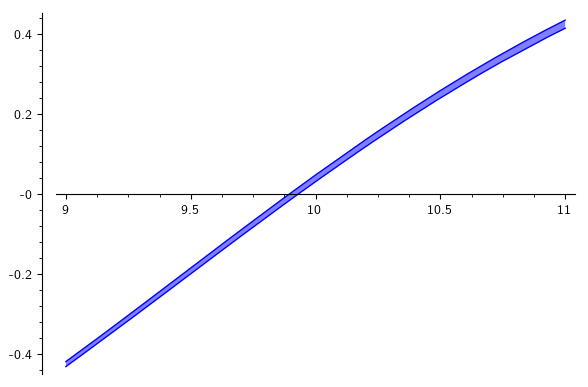

In [37]:
plot((lambda t: observer(t).lower(), lambda t: observer(t).upper()),
     (s.n('Time'), 9, 11),
     plot_points=20,
     adaptive_recursion=0,
     fillcolor='blue',
     color='blue',
     fill={0: [1]})